In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import linear_model


In [3]:
rawdata = pd.read_csv('datasets/NEW_YORK-Offenses_Known_to_Law_Enforcement_by_City_2013_clean.csv')

colnames = ['city','population','violentcrime','murder','revisedrape','legacyrape','robbery','aggravatedassault','propertycrime','burglary','larceny','autotheft','arson']
rawdata.columns = colnames
print(rawdata.head())

                       city population violentcrime  murder  revisedrape  \
0             Adams Village      1,861            0     0.0          NaN   
1  Addison Town and Village      2,577            3     0.0          NaN   
2             Akron Village      2,846            3     0.0          NaN   
3                    Albany     97,956          791     8.0          NaN   
4            Albion Village      6,388           23     0.0          NaN   

  legacyrape robbery aggravatedassault propertycrime burglary larceny  \
0          0       0                 0            12        2      10   
1          0       0                 3            24        3      20   
2          0       0                 3            16        1      15   
3         30     227               526         4,090      705   3,243   
4          3       4                16           223       53     165   

  autotheft  arson  
0         0    0.0  
1         1    0.0  
2         0    0.0  
3       142    NaN  

In [4]:
filleddata = rawdata.fillna(value='0')
print(filleddata.head())

                       city population violentcrime murder revisedrape  \
0             Adams Village      1,861            0      0           0   
1  Addison Town and Village      2,577            3      0           0   
2             Akron Village      2,846            3      0           0   
3                    Albany     97,956          791      8           0   
4            Albion Village      6,388           23      0           0   

  legacyrape robbery aggravatedassault propertycrime burglary larceny  \
0          0       0                 0            12        2      10   
1          0       0                 3            24        3      20   
2          0       0                 3            16        1      15   
3         30     227               526         4,090      705   3,243   
4          3       4                16           223       53     165   

  autotheft arson  
0         0     0  
1         1     0  
2         0     0  
3       142     0  
4         5     

In [5]:
#replace all these freaking strings with ints by removing the commas
strdata = filleddata.iloc[:, 1:]
for col in strdata.columns:
    newvals = []
    for val in strdata[col]:
        if(type(val)==str):
            val=val.replace(',','')
        newvals.append(val)
    strdata[col] = newvals

cleandata = strdata

c:\users\nekon\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [6]:
c = 0 
while c < len(cleandata.columns):
    r = 0
    while r < len(cleandata.iloc[:, c]):
        cleandata.iloc[r, c] = int(float(cleandata.iloc[r, c]))
        r+=1
    c+=1
    
print(cleandata['population'].dtype)

c:\users\nekon\appdata\local\programs\python\python36-32\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
c:\users\nekon\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


int64


In [7]:
filleddata.iloc[:, 1:] = cleandata

In [8]:
filleddata['popsquared'] = filleddata['population']**2
print(filleddata.head())

                       city population violentcrime murder revisedrape  \
0             Adams Village       1861            0      0           0   
1  Addison Town and Village       2577            3      0           0   
2             Akron Village       2846            3      0           0   
3                    Albany      97956          791      8           0   
4            Albion Village       6388           23      0           0   

  legacyrape robbery aggravatedassault propertycrime burglary larceny  \
0          0       0                 0            12        2      10   
1          0       0                 3            24        3      20   
2          0       0                 3            16        1      15   
3         30     227               526          4090      705    3243   
4          3       4                16           223       53     165   

  autotheft arson  popsquared  
0         0     0     3463321  
1         1     0     6640929  
2         0     0   

In [17]:
murderbools = []
robberybools = []
for val in filleddata['murder']:
    murderbools.append(val > 0)
for val in filleddata['robbery']:
    robberybools.append(val > 0)
filleddata['murderbool'] = murderbools 
filleddata['robberybool'] = robberybools
print(filleddata.head())

                       city population violentcrime murder revisedrape  \
0             Adams Village       1861            0      0           0   
1  Addison Town and Village       2577            3      0           0   
2             Akron Village       2846            3      0           0   
3                    Albany      97956          791      8           0   
4            Albion Village       6388           23      0           0   

  legacyrape robbery aggravatedassault propertycrime burglary larceny  \
0          0       0                 0            12        2      10   
1          0       0                 3            24        3      20   
2          0       0                 3            16        1      15   
3         30     227               526          4090      705    3243   
4          3       4                16           223       53     165   

  autotheft arson  popsquared  murderbool  robberybool  
0         0     0     3463321       False        False  
1 

In [28]:
#independent variables
ind = filleddata[['population']]

#dependent variable
dep = filleddata['propertycrime'].values.reshape(-1, 1)

regmodel = linear_model.LinearRegression()
regmodel.fit(ind, dep)

print('Coefficients: ', regmodel.coef_)
print('Intercept: ', regmodel.intercept_)
print('R-squared: ', regmodel.score(ind, dep))

Coefficients:  [[0.01695682]]
Intercept:  [112.72351429]
R-squared:  0.9925431962714344


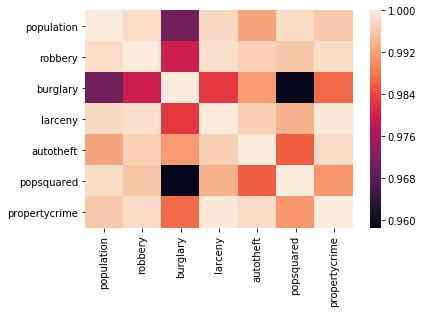

In [27]:
heatmap = ind.astype(float).corr()

sns.heatmap(heatmap, xticklabels=heatmap.columns, yticklabels=heatmap.columns)

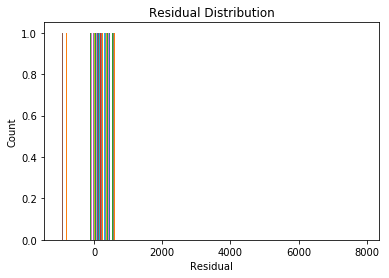

In [32]:
predictions = regmodel.predict(ind).ravel()
residual = filleddata['propertycrime'] - predictions

plt.hist(residual)
plt.title('Residual Distribution')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

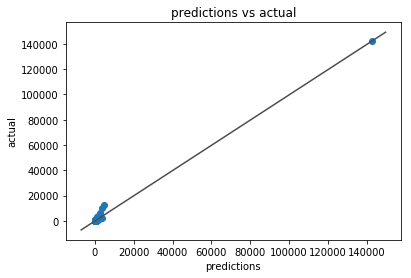

In [30]:
f, ax = plt.subplots()
plt.scatter(predictions, filleddata['propertycrime'])
plt.title('predictions vs actual')
plt.xlabel('predictions')
plt.ylabel('actual')
ax.plot(ax.get_xlim(), ax.get_ylim(), ls="-", c=".3")
plt.show()

In [31]:
from sklearn.model_selection import train_test_split

trainfeatures, testfeatures, trainresults, testresults = train_test_split(ind, dep, test_size = .2)

print('Testing the model on the full dataset: ' + str(regmodel.fit(ind, dep).score(ind, dep)))
print('Testing the model on the heldout dataset: '+str(regmodel.fit(trainfeatures, trainresults).score(testfeatures, testresults)))


Testing the model on the full dataset: 0.9925431962714344
Testing the model on the heldout dataset: 0.5734410764412884


To begin with, the goal of the assignment was to predict the amount of property crime in each city, so I just picked features that seemed like they would be correlated with 'property crime,' to be honest, and I figured I would refine the model from there. However, somehow it made a perfect line through all the data points. It turns out that propertycrime is actually calculated by summing 4 of the other columns of the data table, 3 of which were included as features. The 4th column consisted of all 0s, so it had no impact anyway. In any case though, after creating this preliminary model, it turned out that all of the features were extremely highly correlated with each other as well as the result value. I ended up removing all of the features besides "population" since the other features were extraneous, and still retained an R^2 value greater than .99. 